<blockquote>
    <h1>Exercise 3.14</h1>
    <p>This problem focuses on the <i>collinearity</i> problem.</p>
    <ol>
        <li>Perform the following commands in R:<br>
<code>> set.seed(1)
> x1=runif(100)
> x2=0.5*x1+rnorm(100)/10
> y=2+2*x1+0.3*x2+rnorm(100)
</code>
            The last line corresponds to creating a linear model in which $y$ is a function of $x1$ and $x2$. Write out the form of the linear model. What are the regression coefficients?</li>
        <li>What is the correlation between $x1$ and $x2$? Create a scatterplot displaying the relationship between the variables.</li>
        <li>Using this data, fit a least squares regression to predict $y$ using $x1$ and $x2$. Describe the results obtained. What are $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?</li>
        <li>Now fit a least squares regression to predict $y$ using only $x1$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?</li>
        <li>Now fit a least squares regression to predict $y$ using only $x2$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_2 = 0$?</li>
        <li>Do the results obtained in 3-5 contradict each other? Explain your answer.</li>
        <li>Now suppose we obtain one additional observation, which was unfortunately mismeasured.<br>
<code>> x1=c(x1, 0.1)
> x2=c(x2, 0.8)
> y=c(y,6)    
</code>
            Re-fit the linear models from 3 to 5 using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm

<h3>Exercise 3.14.1</h3>
<blockquote>
    <i>Perform the following commands in R:<br>
<code>> set.seed(1)
> x1=runif(100)
> x2=0.5*x1+rnorm(100)/10
> y=2+2*x1+0.3*x2+rnorm(100)
</code>
            The last line corresponds to creating a linear model in which $y$ is a function of $x1$ and $x2$. Write out the form of the linear model. What are the regression coefficients?</i>
</blockquote>

<p>The last line corresponds to the model
$$
Y = \beta_0 + \beta_1 X1 + \beta_2 X2 + \epsilon \,,
$$
where $\beta_0 = 2$, $\beta_1 = 2$ and $\beta_2 = 0.3$.</p>

In [2]:
np.random.seed(42)
n = 100
x1 = np.random.uniform(low=0.0, high=1.0, size=n)
x2 = 0.5*x1 + 0.1*np.random.normal(size=n, loc=0, scale=1)
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=n, loc=0, scale=1)

<h3>Exercise 3.14.2</h3>
<blockquote>
    <i>What is the correlation between $x1$ and $x2$? Create a scatterplot displaying the relationship between the variables.</i>
</blockquote>

,x1,x2
x1,1.000000,0.831431
x2,0.831431,1.000000


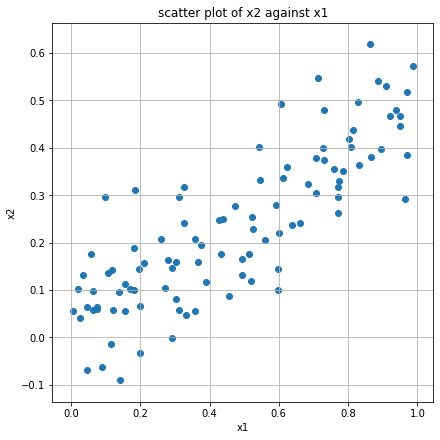

In [3]:
df_X = pd.DataFrame({
    'x1': x1,
    'x2': x2,
})
df_Y = pd.DataFrame({'y': y})

df_X.corr()
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))
_ = ax.scatter(df_X[['x1']], df_X[['x2']])
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')
_ = ax.grid(True)
_ = ax.set_title('scatter plot of x2 against x1')

<p>Thus, we see large collinearity between the two variables, as is expected from the way $x2$ is generated from $x1$.</p>

<h3>Exercise 3.14.3</h3>
<blockquote>
    <i>Using this data, fit a least squares regression to predict $y$ using $x1$ and $x2$. Describe the results obtained. What are $\hat{\beta}_0$, $\hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?</i>
</blockquote>

In [4]:
df_X.insert(0, 'Intercept', 1)
model = sm.OLS(df_Y, df_X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     16.43
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           7.18e-07
Time:                        15:29:27   Log-Likelihood:                -150.66
No. Observations:                 100   AIC:                             307.3
Df Residuals:                      97   BIC:                             315.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0381      0.210      9.718      0.000       1.622       2.454
x1             2.1333      0.674      3.166      0.002       0.796       3.471
x2             0.0282      1.234      0.023      0.982      -2.421       2.478
==============================================================================
Omnibus:                        5.239   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.526
Skew:                           0.306   Prob(JB):                       0.0631
Kurtosis:                       3.975   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>The model yields $\hat{\beta}_0 = 2.04$, $\hat{\beta}_1 = 2.13$ and $\hat{\beta}_2 = 0.03$. Thus, $\hat{\beta}_0$, $\hat{\beta}_1$ approximate $\beta_0$ and $\beta_1$ pretty closely, and $\beta_2$ diverges quite significantly, which is reflected its $p$ value. Looking at the associated $p$ values, we can reject the null hypothesis $H_0 : \beta_1 = 0$, but we can't reject the null hypothesis $H_0 : \beta_2 = 0$.</p>

<h3>Exercise 3.14.4</h3>
<blockquote>
    <i>Now fit a least squares regression to predict $y$ using only $x1$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?</i>
</blockquote>

In [5]:
model = sm.OLS(df_Y, df_X[['Intercept', 'x1']])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     33.19
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           9.66e-08
Time:                        15:29:27   Log-Likelihood:                -150.66
No. Observations:                 100   AIC:                             305.3
Df Residuals:                      98   BIC:                             310.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0387      0.207      9.850      0.000       1.628       2.449
x1             2.1461      0.373      5.761      0.000       1.407       2.885
==============================================================================
Omnibus:                        5.220   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.492
Skew:                           0.306   Prob(JB):                       0.0642
Kurtosis:                       3.971   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Since there is collinearity between $x1$ and $x2$, and now that we are fitting the response only to the variable $x1$, there is a strong relation because it is the only explanatory variable. This is reflected in its extremely small $p$ value, which implies that we can reject the null hypothesis $H_0 : \beta_1 = 0$.</p>

<h3>Exercise 3.14.5</h3>
<blockquote>
    <i>Now fit a least squares regression to predict $y$ using only $x2$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_2 = 0$?</i>
</blockquote>

In [6]:
model = sm.OLS(df_Y, df_X[['Intercept', 'x2']])
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     20.91
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.41e-05
Time:                        15:29:27   Log-Likelihood:                -155.57
No. Observations:                 100   AIC:                             315.1
Df Residuals:                      98   BIC:                             320.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2779      0.204     11.146      0.000       1.872       2.683
x2             3.2763      0.717      4.572      0.000       1.854       4.698
==============================================================================
Omnibus:                        8.745   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               11.550
Skew:                           0.423   Prob(JB):                      0.00310
Kurtosis:                       4.434   Cond. No.                         6.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Since there is collinearity between $x1$ and $x2$, and now that we are fitting the response only to the variable $x2$, there is a strong relation because it is the only explanatory variable. This is reflected in its extremely small $p$ value, which implies that we can reject the null hypothesis $H_0 : \beta_2 = 0$.</p>

<h3>Exercise 3.14.6</h3>
<blockquote>
    <i>Do the results obtained in 3-5 contradict each other? Explain your answer.</i>
</blockquote>

<p>The results appear contradicting due to the collinearity of the explanatory variables $x1$ and $x2$, as explained above.</p>

<h3>Exercise 3.14.7</h3>
<blockquote>
    <i>Now suppose we obtain one additional observation, which was unfortunately mismeasured.<br>
<code>> x1=c(x1, 0.1)
> x2=c(x2, 0.8)
> y=c(y,6)    
</code>
            Re-fit the linear models from 3 to 5 using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.</i>
</blockquote>

In [7]:
df_X.loc[df_X.shape[0]] = [1, 0.1, 0.8]
df_Y.loc[df_Y.shape[0]] = [6]

<p>To understand if this data point is a high-leverage point, we again plot $x2$ vs $x1$, but this time we will give the last data point a different color to be able to distinguish it from the other data points.</p>

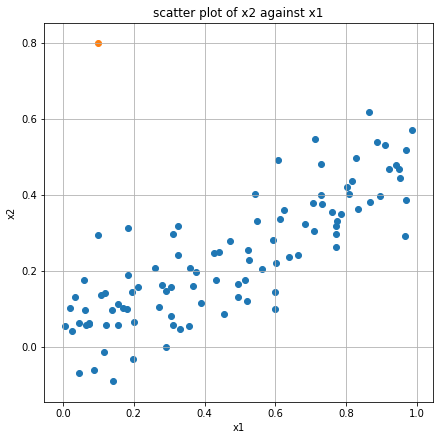

In [8]:
list_of_indices = [df_X.shape[0] - 1]
mask_special_indices = np.zeros(df_X.shape[0], dtype=bool)
mask_special_indices[list_of_indices] = True  

fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 6))
_ = ax.scatter(df_X[['x1']][~mask_special_indices], df_X[['x2']][~mask_special_indices], c='#1f77b4')
_ = ax.scatter(df_X[['x1']][mask_special_indices], df_X[['x2']][mask_special_indices], c='#ff7f0e')
_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')
_ = ax.grid(True)
_ = ax.set_title('scatter plot of x2 against x1')

<p>This shows that the new data point has an unusual value for $x2$ compared to the other values of $x2$. We now fit the models from 3 to 5 using this new data.</p>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     15.69
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.23e-06
Time:                        15:29:28   Log-Likelihood:                -155.02
No. Observations:                 101   AIC:                             316.0
Df Residuals:                      98   BIC:                             323.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0608      0.216      9.562      0.000       1.633       2.488
x1             1.1315      0.567      1.996      0.049       0.006       2.257
x2             2.0298      0.988      2.054      0.043       0.069       3.991
==============================================================================
Omnibus:                        6.027   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.826
Skew:                           0.326   Prob(JB):                       0.0329
Kurtosis:                       4.094   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

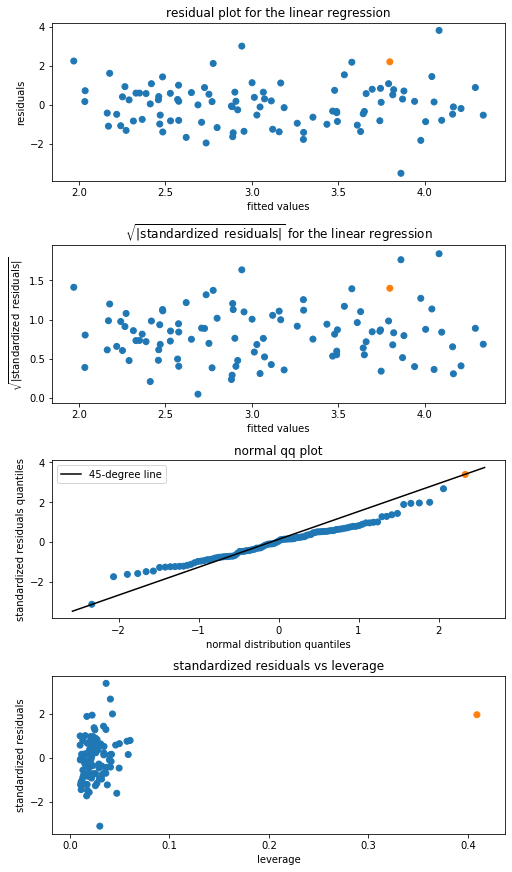

In [9]:
model = sm.OLS(df_Y, df_X)
fitted = model.fit()
fitted.summary()
createResidualPlots(df_X, df_Y, fitted_model=fitted, list_of_indices=[df_X.shape[0]-1])

<p>The (adjusted) $R^2$ indicated that the model is fitting the new data slightly worse than before. Furthermore, the new estimates for $\beta_0$ and $\beta_1$ diverge significantly from their true values, although their $p$ values indicates that there is a strong relation with $y$. Looking at the diagnostic plots, we see that the new data point has a very high leverage, thus having a large influence on the fit.</p>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.45e-06
Time:                        15:29:29   Log-Likelihood:                -157.15
No. Observations:                 101   AIC:                             318.3
Df Residuals:                      99   BIC:                             323.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1478      0.215     10.002      0.000       1.722       2.574
x1             1.9918      0.388      5.129      0.000       1.221       2.762
==============================================================================
Omnibus:                        9.549   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.390
Skew:                           0.518   Prob(JB):                      0.00336
Kurtosis:                       4.277   Cond. No.                         4.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

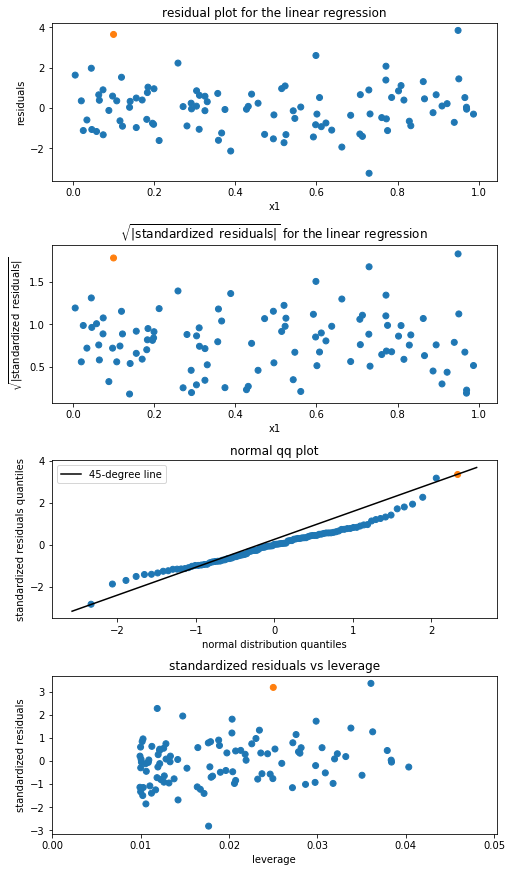

In [10]:
model = sm.OLS(df_Y, df_X[['Intercept', 'x1']])
fitted = model.fit()
fitted.summary()
createResidualPlots(df_X[['Intercept', 'x1']], df_Y, fitted_model=fitted, list_of_indices=[df_X.shape[0]-1])

<p>Overall it appears there is not much difference between the model fitted with the old data and the model fitted with the new data. This is because the new data point doesn't have high leverage and is barely an outlier, thus it doesn't have much influence on the fit of the model.</p>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     26.59
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           1.29e-06
Time:                        15:29:30   Log-Likelihood:                -157.04
No. Observations:                 101   AIC:                             318.1
Df Residuals:                      99   BIC:                             323.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2382      0.199     11.231      0.000       1.843       2.634
x2             3.4866      0.676      5.157      0.000       2.145       4.828
==============================================================================
Omnibus:                        8.123   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               10.732
Skew:                           0.385   Prob(JB):                      0.00467
Kurtosis:                       4.399   Cond. No.                         6.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

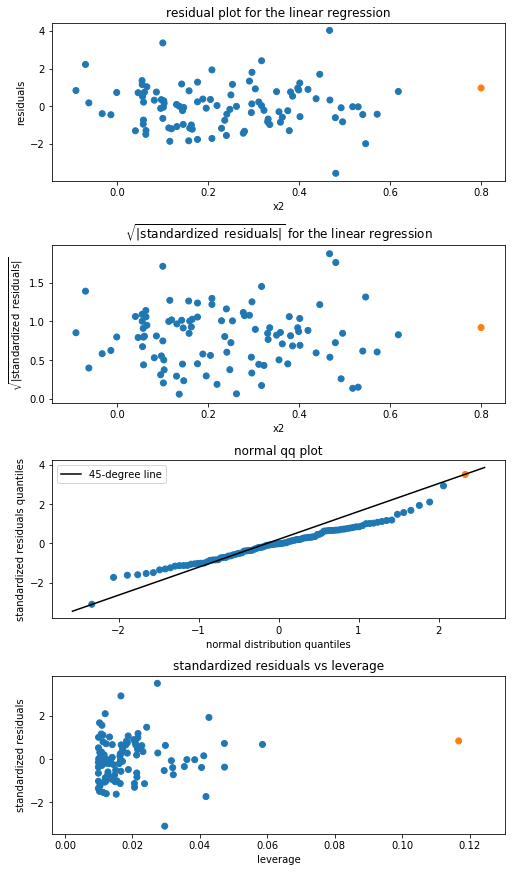

In [11]:
model = sm.OLS(df_Y, df_X[['Intercept', 'x2']])
fitted = model.fit()
fitted.summary()
createResidualPlots(df_X[['Intercept', 'x2']], df_Y, fitted_model=fitted, list_of_indices=[df_X.shape[0]-1])

<p>These results are quite interesting. The (adjusted) $R^2$ shows that the new data improves the fit of the model, and the $F$-statistic indicates that there is stronger relation between the independent and dependent variable. Furthermore, $\hat{\beta}_1$ and $\hat{\beta}_2$ of the new model are very similar to the estimates of the old model. I did not expect this, because the leverage plot shows that this new data point has a very large leverage.</p>